In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
project_path = f'{os.getcwd()}/..'
pdf_path = f'{project_path}/data/pdfs'
pdf_file_path = f'{pdf_path}/infancy eye tracking'
data_dir_path = f'{pdf_file_path}/logfiles_Eye Tracking in Infancy Research.pdf_2024-03-14_14-02-11'
data_path = f'{data_dir_path}/1.log'
print(data_path)

/Users/andreas/Documents/eye-tracking-seminar/code/../data/pdfs/infancy eye tracking/logfiles_Eye Tracking in Infancy Research.pdf_2024-03-14_14-02-11/1.log


In [98]:
def extract_numeric_values(s):
        values = s.split(',')  
        return [float(value) for value in values]

def generate_data_dict(path):
    with open(path, 'r') as file:
        data_string = file.read()
        
    data = [extract_numeric_values(line) for line in data_string.split('\n') if line != '']
    data_dict = {
        'timestamp' : [],
        'left_x' : [],
        'left_y' : [],
        'right_x' : [],
        'right_y' : [],
    }

    # fill dict
    for line in data:
        if len(line) == 5:
            data_dict['timestamp'].append(line[0])
            data_dict['left_x'].append(line[1])
            data_dict['left_y'].append(line[2])
            data_dict['right_x'].append(line[3])
            data_dict['right_y'].append(line[4])

    # calculate combined gaze point
    data_dict['combined_x'] = [(left + right) / 2 for left, right in zip(data_dict['left_x'], data_dict['right_x'])]
    data_dict['combined_y'] = [(left + right) / 2 for left, right in zip(data_dict['left_y'], data_dict['right_y'])]

    return data_dict

def heatmap_data(path):
    data_dict = generate_data_dict(path)
    
    
    plt.figure(figsize=(8, 6))
    plt.hexbin(data_dict['combined_x'], data_dict['combined_y'], gridsize=50, cmap='hot')  
    plt.colorbar(label='Frequency')
    plt.xlabel('X Gaze Coordinate')
    plt.ylabel('Y Gaze Coordinate')
    plt.title('Combined Gaze Heatmap')
    # invert y axis (since screen coordinates are top-left origin)
    plt.gca().invert_yaxis()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=data_dict['combined_x'], y=data_dict['combined_y'], cmap='hot', fill=True, thresh=0.05)
    plt.xlabel('X Gaze Coordinate')
    plt.ylabel('Y Gaze Coordinate')
    plt.title('Combined Gaze Heatmap (KDE)')
    # invert y axis (since screen coordinates are top-left origin)
    plt.gca().invert_yaxis()
    plt.show()

def scatter_gaze(path):
    '''Scatterplot of left eye gaze point in user coordinate system.'''

    data_dict = generate_data_dict(path)
    
    # scatterplot
    plt.figure(figsize=(8, 8))
    plt.scatter(data_dict['combined_x'], data_dict['combined_y'], c=data_dict['timestamp'], cmap='viridis', s=10)
    plt.colorbar(label='timestamp')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('gaze data (combined)')
    plt.show()

import numpy as np
def get_degree_from_deltas(delta_x, delta_y):
    return (np.arctan2(delta_x, delta_y) / np.pi * 180) % 360
# print(get_degree_from_deltas(0, 1))
# print(get_degree_from_deltas(1, 1))
# print(get_degree_from_deltas(1, 0))
# print(get_degree_from_deltas(1, -1))
# print(get_degree_from_deltas(0, -1))
# print(get_degree_from_deltas(-1, -1))
# print(get_degree_from_deltas(-1, 0))
# print(get_degree_from_deltas(-1, 1))

def get_color_from_degree(degree):
    #return (np.sin(degree * np.pi / 180) / 2 + 0.5, -np.sin(degree * np.pi / 180) / 2 + 0.5, 0)
    return (np.sin(degree * np.pi / 180) / 2 + 0.5, -np.sin(degree * np.pi / 180) / 2 + 0.5, np.cos(degree * np.pi / 180) / 2 + 0.5)
# for i in range(0, 360, 45):
#     print(i, get_color_from_degree(i))


def arrow_gaze(path):
    data_dict = generate_data_dict(path)

    # scatterplot
    plt.figure(figsize=(10, 10))

    kwargs = dict(
            width=0.01,
            length_includes_head=True,
            shape='full',
        )
    for i in range(len(data_dict['timestamp'])-1):
        delta_x = data_dict['combined_x'][i+1] - data_dict['combined_x'][i]
        delta_y = data_dict['combined_y'][i+1] - data_dict['combined_y'][i]
        euclidean_distance = (delta_x**2 + delta_y**2)**0.5
        plt.arrow(
            x=data_dict['combined_x'][i],
            y=data_dict['combined_y'][i],
            dx=delta_x,
            dy=delta_y,
            alpha=euclidean_distance,
            color=get_color_from_degree(get_degree_from_deltas(delta_x, delta_y)),
            **kwargs
            )
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('gaze arrows (combined)')
    plt.show()

def all_plots(path):
    scatter_gaze(path)
    arrow_gaze(path)
    heatmap_data(path)

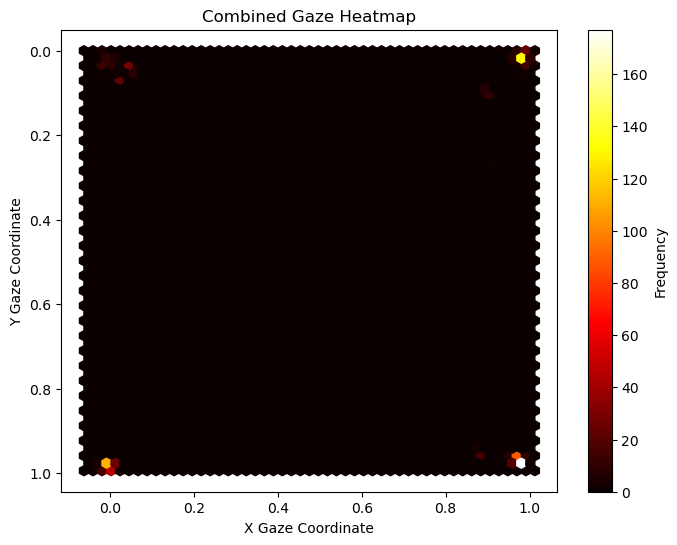

/Users/andreas/miniconda3/envs/es/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andreas/miniconda3/envs/es/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


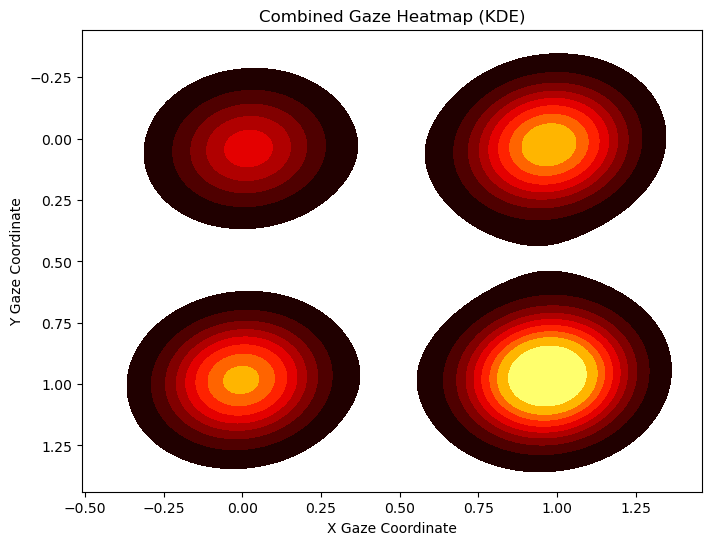

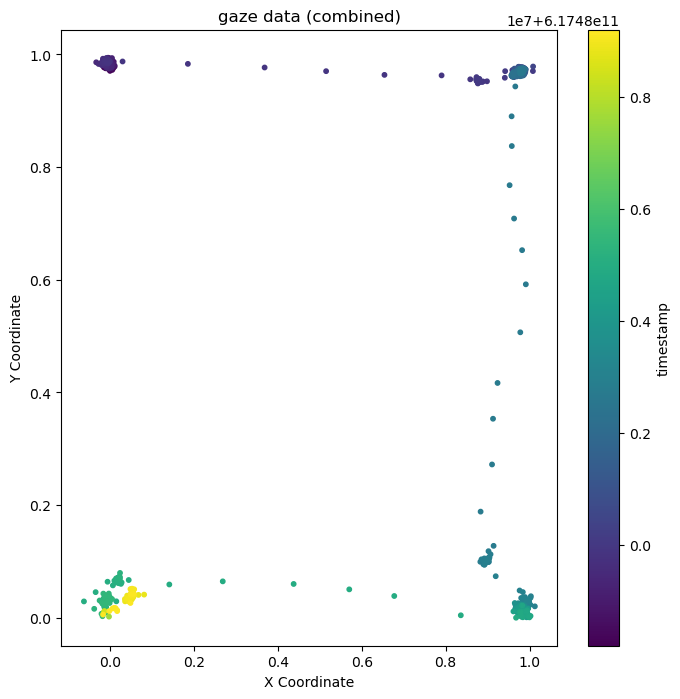

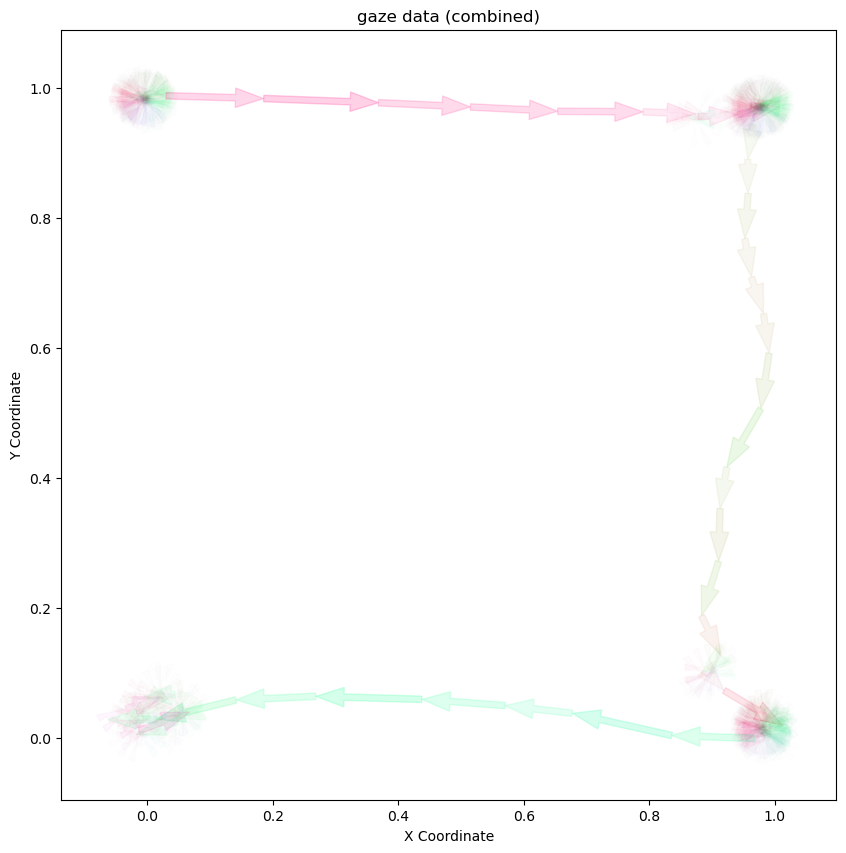

In [100]:
all_plots(data_path)